# 4. Convergencia de vector aleatorio a foto personal

## Importando librerías

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Leyendo foto y vectorizandola

In [2]:
# Step 1: Load and preprocess the image
image = Image.open('datasets/MyPicture.jpg').convert('L').resize((400, 600))  # Convert to grayscale


# Step 2: Flatten the image
original_flat = np.array(image)#.flatten()

# Step 3: Generate a random array
random_array = np.random.rand(*original_flat.shape)


In [3]:
original_flat

array([[216, 216, 216, ..., 227, 226, 227],
       [216, 216, 216, ..., 226, 226, 227],
       [217, 216, 216, ..., 227, 226, 227],
       ...,
       [ 31,  29,  26, ...,  27,  28,  28],
       [ 30,  28,  24, ...,  26,  26,  24],
       [ 29,  29,  27, ...,  26,  23,  23]], dtype=uint8)

In [4]:
random_array

array([[0.06954504, 0.63686279, 0.87852355, ..., 0.77332692, 0.87530007,
        0.16159137],
       [0.96946431, 0.59760275, 0.33440336, ..., 0.13621826, 0.24501517,
        0.22106386],
       [0.3553952 , 0.8942609 , 0.71214827, ..., 0.64761847, 0.48844985,
        0.93556984],
       ...,
       [0.68523343, 0.22954771, 0.0768997 , ..., 0.3936837 , 0.70223847,
        0.69736214],
       [0.42220816, 0.16523042, 0.5814733 , ..., 0.72147375, 0.58652172,
        0.81796331],
       [0.60998631, 0.49132289, 0.05189684, ..., 0.78822191, 0.28663054,
        0.9031905 ]])

## Definiendo función de recursión

In [11]:
# Step 4: Implement Recursion
def optimize_array(iteration, current_array, original_array, learning_rate):
    # Calculate Euclidean distance
    distance = np.linalg.norm(current_array - original_array,ord='fro')
    
    # Display progress
    if iteration <=10 or iteration % 100 == 0 or distance <0.5:
        print(f"Iteration {iteration}, Distance: {distance}")
        plt.figure(figsize=(5,3))
        plt.imshow(current_array.reshape(600, 400), cmap='gray')
        plt.axis('off')
        plt.show()

    # Convergence condition
    if distance < 0.5:
        print(f"After Iteration number {iteration} all the pictures have a distance (In Frobeniuns Norm) less than 0.5 of original Picture")
        return current_array
    
    
    
    # Update the array using learning_rate
    updated_array = current_array - learning_rate * (current_array - original_array)
    
    # Recursively call the function
    return optimize_array(iteration + 1, updated_array, original_array, learning_rate)

## Ejecutando función

Iteration 0, Distance: 77702.46132385706


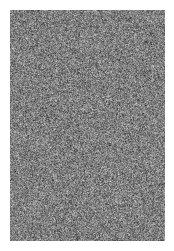

Iteration 1, Distance: 76925.43671061848


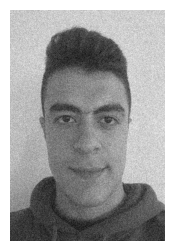

Iteration 2, Distance: 76156.18234351231


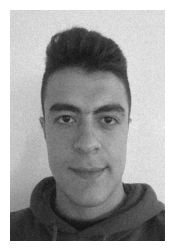

Iteration 3, Distance: 75394.62052007717


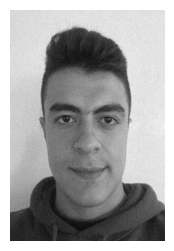

Iteration 4, Distance: 74640.6743148764


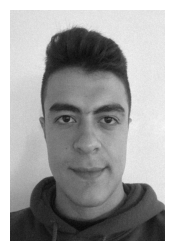

Iteration 5, Distance: 73894.26757172764


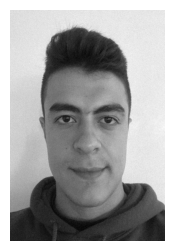

Iteration 6, Distance: 73155.32489601038


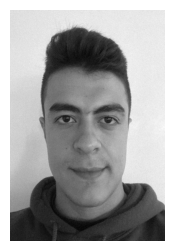

Iteration 7, Distance: 72423.77164705026


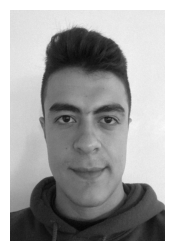

Iteration 8, Distance: 71699.53393057975


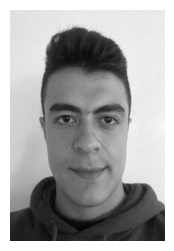

Iteration 9, Distance: 70982.53859127397


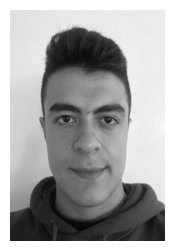

Iteration 10, Distance: 70272.71320536123


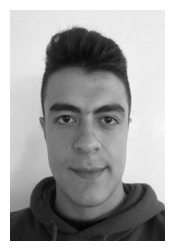

Iteration 100, Distance: 28441.613841063965


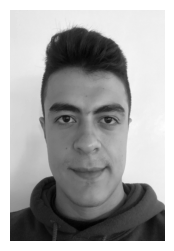

Iteration 200, Distance: 10410.550503833732


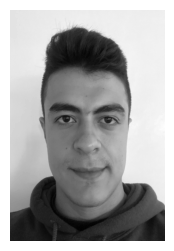

Iteration 300, Distance: 3810.59817486146


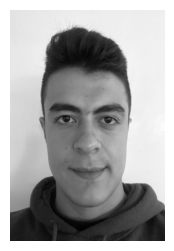

Iteration 400, Distance: 1394.8021715960356


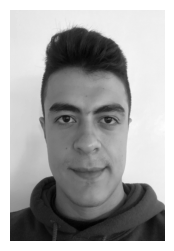

Iteration 500, Distance: 510.5427044822817


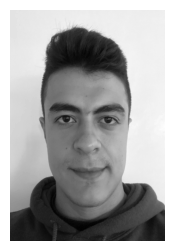

Iteration 600, Distance: 186.87514144161605


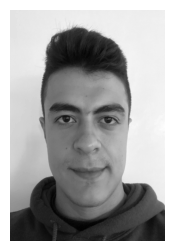

Iteration 700, Distance: 68.40234554764064


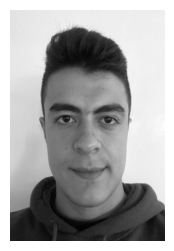

Iteration 800, Distance: 25.037470689383323


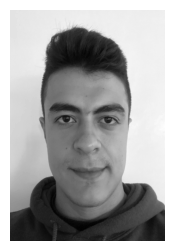

Iteration 900, Distance: 9.164524015994763


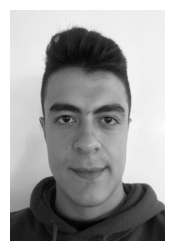

Iteration 1000, Distance: 3.3545121822293194


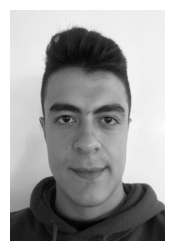

Iteration 1100, Distance: 1.2278599478908792


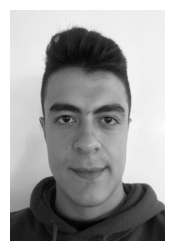

Iteration 1190, Distance: 0.49695417888250737


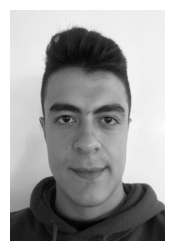

After Iteration number 1190 all the pictures have a distance (In Frobeniuns Norm) less than 0.5 of original Picture


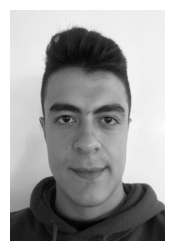

In [12]:
# Step 5: Define learning rate and start recursion
learning_rate = 0.01

optimized_array = optimize_array(0, random_array, original_flat, learning_rate)

# Step 6: Plot the final result
plt.figure(figsize=(5,3))
plt.imshow(optimized_array.reshape(600, 400), cmap='gray')
plt.axis('off')
plt.show()
